In [18]:
from src.model import AutoEncoder
from src.data import QuarkDataset, train_val_test_split
from torch.utils.data import DataLoader
import multiprocessing as mp
import pytorch_lightning as pl
import matplotlib.pyplot as plt

In [19]:
path = "Data/processed/quark-gluon-uncompressed.hdf5"
cpu_count = mp.cpu_count()

In [20]:
dataset = QuarkDataset(path)

In [21]:
datasets = train_val_test_split(dataset)
data_loaders = {}
for key in datasets.keys():
    if key == "train":
        data_loaders[key] = DataLoader(datasets[key], batch_size=128, shuffle=True, num_workers=cpu_count, prefetch_factor=2*cpu_count)
    else:
        data_loaders[key] = DataLoader(datasets[key], batch_size=128, shuffle=False, num_workers=cpu_count)

In [22]:
encoder_params = (3, 7, 4)
decoder_params = (4, 7, 3)

In [23]:
model = AutoEncoder(encoder_params, decoder_params)

In [26]:
trainer = pl.Trainer(max_epochs=10, accelerator="gpu", devices="auto", auto_lr_find=True,deterministic=True, enable_progress_bar=False)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [27]:
trainer.fit(model, data_loaders["train"], data_loaders['val'])

Missing logger folder: /home/guru/Desktop/ml4sci/genie-gsoc-23/lightning_logs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 4.4 K 
1 | decoder | Decoder | 3.8 K 
------------------------------------
8.2 K     Trainable params
0         Non-trainable params
8.2 K     Total params
0.033     Total estimated model params size (MB)
`Trainer.fit` stopped: `max_epochs=10` reached.


In [11]:
x = next(iter(data_loaders['test']))

In [12]:
x_hat = trainer.predict(model, x)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 653it [00:00, ?it/s]

/home/guru/miniconda3/envs/gnn/lib/python3.9/site-packages/pytorch_lightning/loops/epoch/prediction_epoch_loop.py:173: UserWarning: Lightning couldn't infer the indices fetched for your dataloader.
  warning_cache.warn("Lightning couldn't infer the indices fetched for your dataloader.")


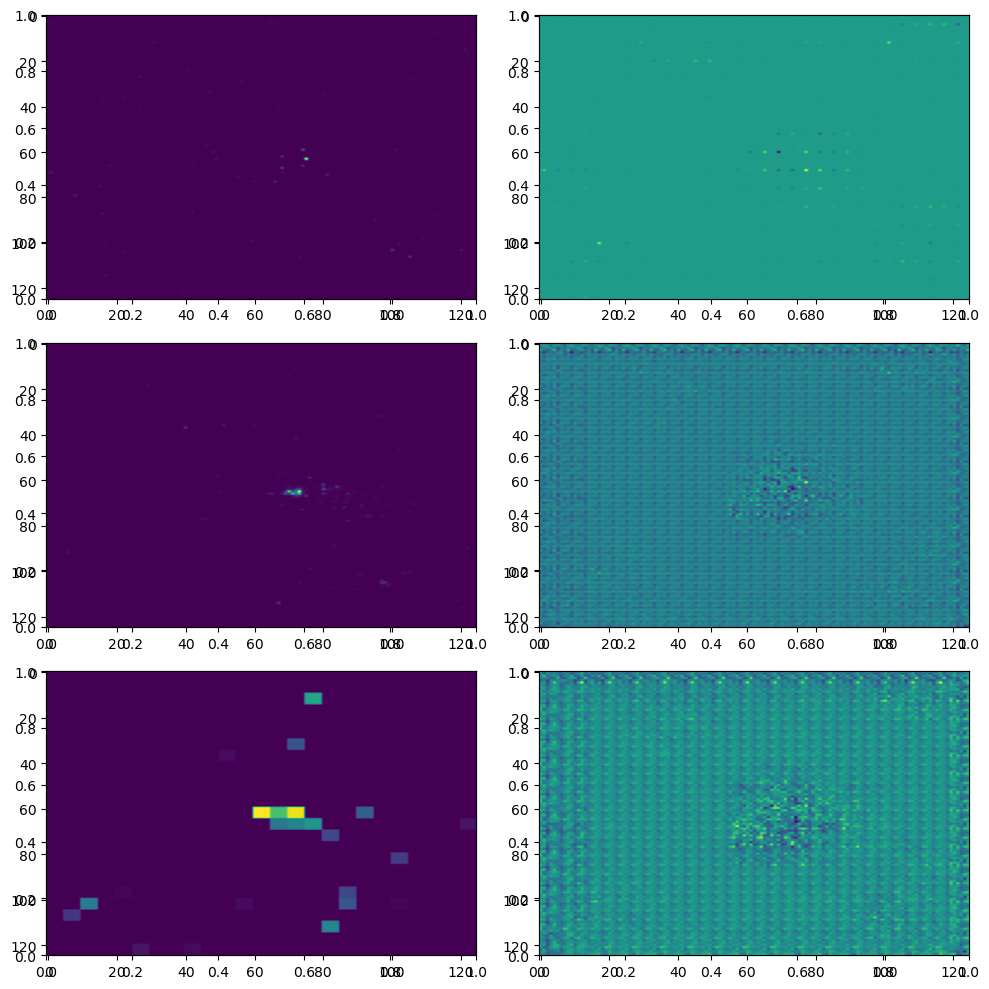

In [13]:
n = 6
rows = 3
cols = 2
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (10,10))
for i, idx in enumerate(range(1, 6, 2)):
    fig.add_subplot(rows, cols, idx)
    plt.imshow(x[0][i], aspect='auto')
    fig.add_subplot(rows, cols, idx+1)
    plt.imshow(x_hat[0][i].detach().numpy(), aspect='auto')

fig.tight_layout()
plt.show()

In [17]:
import torch.nn.functional as F

In [ ]:
error = F.mse_loss(x, x_hat, )